<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Predict credit defaults with random forest using Python**


Estimated time needed: **30** minutes


This project is based on the [IBM developer tutorial: Using random forest to predict credit defaults using Python](https://developer.ibm.com/tutorials/awb-random-forest-predict-credit-defaults/) by Karina Kervin.


## Introduction

You work for a company that provides car loans with interest rates. Recently, loan underwriters have been issuing a significant number of loans that end up defaulting. As a result, there’s a need to improve the underwriting process. To address this issue, you decide to use a random forest algorithm to enhance the accuracy and reliability of loan approvals.

<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/fKgtqohuI-r7pZRuuBihew/dall--e-2024-05-28-10-28-24---a-well-dressed-man-standing-next-to-a-luxury-car-in-front-of-a-rundown--dilapidated-house--the-car-is-polished-and-gleaming--contrasting-sharply-with-.jpg" alt="Image" width="500"/>

 


## What does this guided project do?

This project begins with an exploration of data loading and preprocessing techniques. You learn the essentials of handling missing values, encoding categorical variables, and normalizing numerical features by using pandas and scikit-learn. This ensures that your data is pristine and ready for the magic of machine learning.

Next, you unleash the power of the random forest algorithm. You work through the process of splitting your data into training and testing sets, fitting the model, and making predictions. You discover how random forest's ensemble approach, which merges multiple decision trees, enhances prediction accuracy and robustness, especially for complex data sets.

But, you won't stop there. Understanding your model's performance is crucial. So, you'll delve into evaluating the model using metrics. 

To take your model to the next level, you're introduced to advanced techniques for fine-tuning by using hyperparameter adjustment to enhance model performance.

By the end of this tutorial, you are armed with a comprehensive understanding of implementing and evaluating a random forest model for predicting credit defaults, showcasing the practical benefits of this method in real-world financial scenarios. This project is designed not just to teach you, but to inspire you with the real-world applications of machine learning in the banking industry.

This tutorial is perfect for data science enthusiasts, financial analysts, and machine learning practitioners with a foundational knowledge of Python and machine learning principles.


## Background


### What is random forest


[Random forest](https://www.ibm.com/topics/random-forest?utm_source=skills_network&utm_content=in_lab_content_link&utm_id=Lab-Random+Forest+Lab_v1_1717603754) is a commonly-used **machine learning algorithm**, trademarked by Leo Breiman and Adele Cutler, that combines the output of multiple **decision trees** to reach a single result. Its ease of use and flexibility have fueled its adoption, as it handles both classification and regression problems.


### How it works

Random forest algorithms have three main hyperparameters, which must be set before training:
+ Node size
+ The number of trees
+ The number of features sampled

From there, you can use the random forest classifier to solve for regression or classification problems.

The following image shows a typical random forest.

<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/wmw8tYbZuTATfF1z5e0phA/random-forest.png" alt="Image" width="800"/>



### What is a decision tree

A [decision tree](https://www.ibm.com/topics/decision-trees?utm_source=skills_network&utm_content=in_lab_content_link&utm_id=Lab-Random+Forest+Lab_v1_1717603754) is a non-parametric **supervised learning algorithm** that is utilized for both classification and regression tasks. It has a hierarchical, tree structure, which consists of a root node, branches, internal nodes, and leaf nodes.

The following image shows an example of real situation. Imagine that you were trying to assess whether you should go surfing. You might use the following decision rules to make a choice.

<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/xRWAXqej4sL8eQUsJD6iqw/ICLH-Diagram-Batch-03-24A-AI-ML-DecisionTree.png" alt="Image" width="800"/>


## Table of contents

1. [Objectives](#Objectives)
2. [Setup](#Setup)
   1. [Installing required libraries](#Installing-Required-Libraries)
   2. [Importing required libraries](#Importing-Required-Libraries)
3. [Import data](#Import-Data)
4. [Analyze missing data](#Analyze-missing-data)
5. [Downsample the data set](#Downsample-the-data-set)
6. [Hot encode the independent variables](#Hot-encode-the-independent-variables)
7. [Split the data set](#Split-the-data-set)
8. [Classify accounts and evaluate the model](#Classify-accounts-and-evaluate-the-model)
9. [Optimize the model with hyperparameter tuning](#Optimize-the-model-with-hyperparameter-tuning)
10. [Summary](#Summary)


## Objectives

After you complete the project, you:

- Understand the fundamentals of the **random forest algorithm** and its application in **financial data science**.
- Gain proficiency in using **Python** and the **scikit-learn** library to build predictive models.
- Develop skills in preparing financial data for machine learning tasks, including data cleaning and feature engineering.
- Learn to **evaluate** model performance using metrics.


----


## Setup


For this lab, you use the following libraries:

*   [`pandas`](https://pandas.pydata.org/) for managing the data.
*   [`numpy`](https://numpy.org/) for mathematical operations.
*   [`sklearn`](https://scikit-learn.org/) for machine learning and machine learning pipeline-related functions.
*   [`seaborn`](https://seaborn.pydata.org/) for visualizing the data.
*   [`matplotlib`](https://matplotlib.org/) for additional plotting tools.
*   [`xlrd`](https://xlrd.readthedocs.io/en/latest/) for reading data and formatting information from Excel files in the historical `.xls` format.


### Installing required libraries


The following required libraries are __not__ pre-installed in the Skills Network Labs environment. __You must run the following cell__ to install them. Please wait until it is complete.


In [ ]:
# Install necessary packages
%pip install -q \
    numpy==1.26.4 \
    pandas==2.2.2 \
    matplotlib==3.9.0 \
    seaborn==0.13.2 \
    scikit-learn==1.4.2 \
    xlrd==2.0.1

### Importing required libraries


The following code cell accomplishes two tasks: it **imports the required libraries** and **loads a YouTube video**. This video provides a fundamental understanding of how random forests operate.

**It’s strongly recommended that you take the time to watch it!**


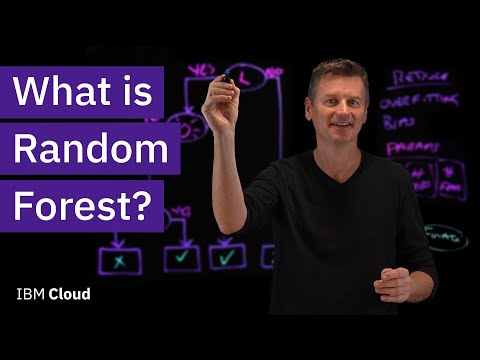

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

import warnings

# Suppress warnings:
def warn(*args, **kwargs):
    pass

warnings.warn = warn
warnings.filterwarnings('ignore')

sns.set_context('notebook')
sns.set_style('white')

# The following code loads the YouTube video:
from IPython.display import YouTubeVideo
YouTubeVideo('gkXX4h3qYm4', width=800, height=452)

### Import data


The task for this tutorial is to predict the probability of a customer defaulting on a loan. The target variable is "default payment." Details of the data measurements can be found in [UCI's data repository](https://archive.ics.uci.edu/dataset/350/default+of+credit+card+clients?utm_source=ibm_developer&utm_content=in_content_link&utm_id=tutorials_awb-random-forest-predict-credit-defaults).

This step might take a couple of minutes to complete. Please be patient.


In [3]:
# Import the data set
df = pd.read_excel('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/UEym8G6lwphKjuhkLgkXAg/default%20of%20credit%20card%20clients.xls', header=1)

Exploring the data set is a critical step that should not be overlooked. This can help you to understand what data is available and the quality of that data. This guides both data cleaning and modeling decisions. First, let's look at the first five rows of the DataFrame.


In [4]:
# Explore the first five rows of the data set
df.head(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


Each row represents an individual. Some columns that could be useful are:
+ Credit limit (**LIMIT_BAL**)
+ Prior payment status (**PAY_0,...,PAY_6**)
+ Bill and payment amounts (**BILL_AMT, PAY_AMT**)
+ Target variable that indicates default next month (**default payment next month**)

The following code renames the default column. The ID column is also dropped because it doesn't contain any information relevant to the analysis.


In [5]:
# Rename the columns
df.rename({'default payment next month': 'DEFAULT'}, axis='columns', inplace=True)

#Remove the ID column as it is not informative
df.drop('ID', axis=1, inplace=True)
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


### Analyze missing data

One key step is to check for null values or other invalid input that will cause the model to throw an error. 


In [6]:
# Check dimensions for invalid values
print(f"SEX values include: {df['SEX'].unique()}")
print(f"MARRIAGE values include: {df['MARRIAGE'].unique()}")
print(f"EDUCATION values include: {df['EDUCATION'].unique()}")

# Count missing or null values
print(f"Number of missing values in SEX: {len(df[pd.isnull(df.SEX)])}")
print(f"Number of missing values in MARRIAGE: {len(df[pd.isnull(df.MARRIAGE)])}")
print(f"Number of missing values in EDUCATION: {len(df[pd.isnull(df.EDUCATION)])}")
print(f"Number of missing values in AGE: {len(df[pd.isnull(df.AGE)])}")

# Count of invalid data in EDUCATION and MARRIAGE
invalid_count = len(df.loc[(df['EDUCATION'] == 0) | (df['MARRIAGE'] == 0)])
print(f"Number of invalid data points in EDUCATION or MARRIAGE: {invalid_count}")


SEX values include: [2 1]
MARRIAGE values include: [1 2 3 0]
EDUCATION values include: [2 1 3 5 4 6 0]
Number of missing values in SEX: 0
Number of missing values in MARRIAGE: 0
Number of missing values in EDUCATION: 0
Number of missing values in AGE: 0
Number of invalid data points in EDUCATION or MARRIAGE: 68


The output indicates that some of the data does not align with the data definitions, specifically the EDUCATION and MARRIAGE columns. 

* **EDUCATION** includes three types of invalid values, which are 0, 5, and 6.
* **MARRIAGE** includes 0 as an invalid value. 

Assume that a 0 encoding is supposed to represent missing data and that a value of 5 or 6 within EDUCATION is representative of other unspecified education levels (for example, Ph.D. or a master's degree), which is not represented within the data definition.
**68** rows exist in the DataFrame where either the **EDUCATION** or the **MARRIAGE** column is zero. 

Next, let's filter the rows where the EDUCATION and MARRIAGE columns have non-zero values. 

The following code creates a new DataFrame with the missing values for **EDUCATION** and **MARRIAGE** removed. We end up with 29,932 rows remaining.


In [7]:
print(f"shape of data: {df.shape}")

#Filter the DataFrame
df_no_missing_data = df.loc[(df['EDUCATION'] != 0) & (df['MARRIAGE'] != 0)]
print(f"shape of no_missing_data: {df_no_missing_data.shape}")

shape of data: (30000, 24)
shape of no_missing_data: (29932, 24)


The next step is to check if the target variable, which indicates whether someone defaulted, is balanced.
The chart shows counts of people who have defaulted (1) and haven't defaulted (0). 
Unsurprisingly, most people have not defaulted on their loans.

To address this class imbalance, you must down sample the data.


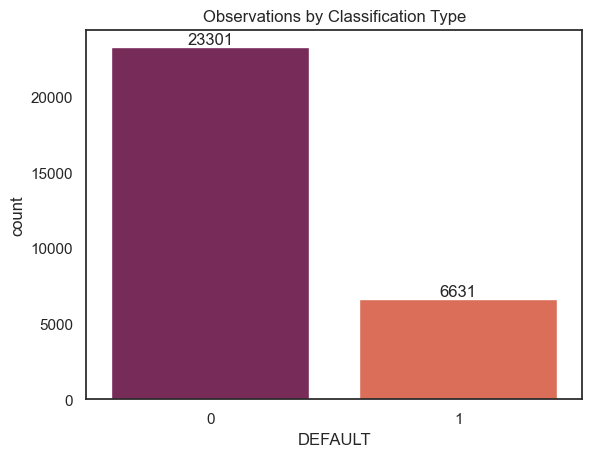

In [8]:
# Explore distribution of data set
# count plot on ouput variable
ax = sns.countplot(x = df_no_missing_data['DEFAULT'], palette = 'rocket')

#add data labels
# ax.bar_label(ax.containers[0])
for container in ax.containers:
    ax.bar_label(container)

# add plot title
plt.title("Observations by Classification Type")

# show plot
plt.show()

### Downsample the data set

The first step in downsampling is to split the data based on those who defaulted on their loan and those who did not default on their loan. 

You will randomly select 1,000 samples from each category. 

The two data sets are then merged back together to create an analysis data set.


In [9]:
# split data
df_no_default = df_no_missing_data.loc[(df_no_missing_data['DEFAULT']==0)]
df_default = df_no_missing_data.loc[(df_no_missing_data['DEFAULT']==1)]

# downsample the data set
df_no_default_downsampled = resample(df_no_default, replace=False, n_samples=1000, random_state=0)
df_default_downsampled = resample(df_default, replace=False, n_samples=1000, random_state=0)

#check ouput
print(f"Length of df_no_default_downsampled: {len(df_no_default_downsampled)}")
print(f"Length of df_default_downsampled: {len(df_default_downsampled)}")

# merge the data sets
df_downsample = pd.concat([df_no_default_downsampled, df_default_downsampled ])
print(f"Shape of df_downsample: {df_downsample.shape}")

Length of df_no_default_downsampled: 1000
Length of df_default_downsampled: 1000
Shape of df_downsample: (2000, 24)


### Hot encode the independent variables

Next, you convert each category into a binary variable with a value of 0 or 1. Pandas has a very convenient function to do just this, called `get_dummies`.

**Why hot encode?**

* Improved model performance
* Avoid implicit ordering
* Compatibility and consistency

One thing to keep in mind when creating models is to avoid bias. One very important way to do this is to not use variables associated with protected attributes as independent variables. In this case, SEX, AGE, and MARRIAGE clearly fall into that category. EDUCATION is somewhat more ambiguous. Because it is not critical for the purposes of this tutorial, this is dropped as well.


In [10]:
# isolate independent variables
X = df_downsample.drop(['DEFAULT','SEX', 'EDUCATION', 'MARRIAGE','AGE'], axis=1).copy()
print(f"Shape of X: {X.shape}")

# NOTE: 'PAY_1' is not shown in original data
X_encoded = pd.get_dummies(data=X, columns=['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'])
print(f"Shape of X_encoded: {X_encoded.shape}")
X_encoded.head()

Shape of X: (2000, 19)
Shape of X_encoded: (2000, 70)


,LIMIT_BAL,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,...,PAY_5_7,PAY_6_-2,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7
2320,50000,390,918,19583,19593,19364,19893,918,19583,1000,...,False,False,False,True,False,False,False,False,False,False
2887,500000,24170,8051,77908,50297,43679,49749,8091,78192,65,...,False,False,False,True,False,False,False,False,False,False
9916,220000,4289,4637,1252,8069,18117,23176,1031,3077,7500,...,False,False,False,True,False,False,False,False,False,False
24070,80000,77901,79605,79207,0,0,0,3600,2407,0,...,False,True,False,False,False,False,False,False,False,False
16550,220000,38074,43083,47051,65321,83882,72812,6000,5000,20012,...,False,False,False,True,False,False,False,False,False,False


### Split the data set

Splitting the data into test and training sets is critical for understanding how your model performs on new data. 
The random forest model uses the training data set to learn what factors should become decision nodes. 
The test set helps you evaluate how often those decisions lead to the correct decision.


In [11]:
# Split the data
y = df_downsample['DEFAULT'].copy()
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=0)

print(f'X_train.shape: {X_train.shape}')
print(f'X_test.shape: {X_test.shape}')
print(f'y_train.shape: {y_train.shape}')
print(f'y_test.shape: {y_test.shape}')

X_train.shape: (1400, 70)
X_test.shape: (600, 70)
y_train.shape: (1400,)
y_test.shape: (600,)


### Classify accounts and evaluate the model

Now, it's time to build an initial random forest model by fitting it by using the training data and evaluating the resulting model using the test data. To make that evaluation easier, you plot the results using a [confusion matrix](https://www.ibm.com/topics/confusion-matrix?utm_source=skills_network&utm_content=in_lab_content_link&utm_id=Lab-Random+Forest+Lab_v1_1717603754).


Accuracy: 63.83%
Percentage of correctly predicted Did Not Default: 66.88%
Percentage of correctly predicted Defaulted: 60.62%


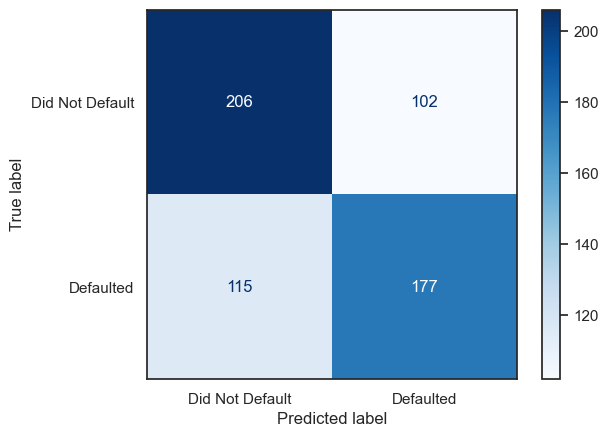

In [12]:
# apply RandomForestClassifier
clf_rf = RandomForestClassifier(max_depth=2, random_state=0)
clf_rf.fit(X_train, y_train)

#calculate overall accuracy
y_pred = clf_rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2%}')

class_names = ['Did Not Default', 'Defaulted']

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the percentage of correctly predicted instances for each class
for i, class_name in enumerate(class_names):
    correct_predictions = cm[i, i]
    total_predictions = cm[i, :].sum()
    class_accuracy = correct_predictions / total_predictions * 100
    print(f'Percentage of correctly predicted {class_name}: {class_accuracy:.2f}%')

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)
plt.show()

As you can see, the model performance could be improved. 


### Optimize the model with hyperparameter tuning

Cross validation and GridSearchCV are useful tools for finding better hyperparameters for models. When it comes to random forest models, you'll focus on `max_depth`, `min_samples_split`, `min_samples_leaf`. Here's a quick overview of what those hyperparameters mean:

- `max_depth`: The maximum number levels the decision trees that make up the random forest are allowed to have
- `min_samples_split`: The minimum number of samples that must be in a node for a decision split to be allowed
- `min_samples_leaf`: The minimum number of samples that must exist in a leaf node


Another commonly used hyperparameter is `max_features`. This is the number of features that the model will try out when attempting to create a decision node. The `n_estimators` hyperparameter controls the number of decision trees that are created as part of the random forest model. For more details and other hyperparameters that can be tuned, see the [sklearn random forest documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html).


Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best parameters found: {'min_samples_split': 3, 'min_samples_leaf': 3, 'max_depth': 4}
Best estimator is: RandomForestClassifier(max_depth=4, min_samples_leaf=3, min_samples_split=3,
                       random_state=0)
Accuracy: 67.00%


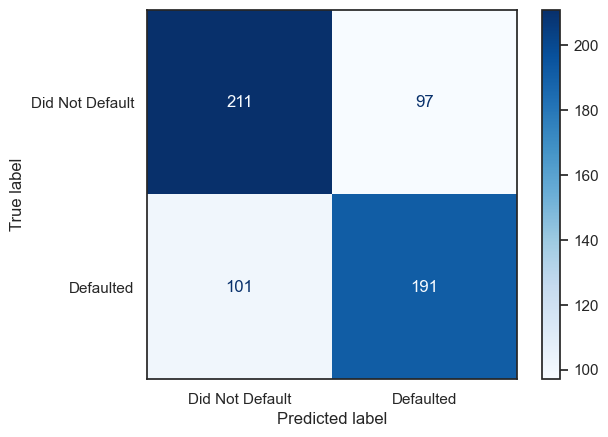

In [13]:
param_grid = {
    'max_depth':[3,4,5],
    'min_samples_split':[3,4,5],
    'min_samples_leaf':[3,4,5],
}

rf_random = RandomizedSearchCV(
    estimator=clf_rf, 
    param_distributions=param_grid, 
    n_iter=27, 
    cv=3, 
    random_state=0, 
    verbose=1,
    n_jobs = -1,
)

# Fit the random search model
rf_random.fit(X_train, y_train)

# Output the best hyperparameters found
best_params = rf_random.best_params_
print(f'Best parameters found: {best_params}')
print(f'Best estimator is: {rf_random.best_estimator_}')

# Refit the model using the best hyperparameters
best_clf_rf = rf_random.best_estimator_

# In case you want to check all parameters currently in use
# print(f'Parameters currently in use: {best_clf_rf.get_params()}')

# Train the refitted model
best_clf_rf.fit(X_train, y_train)

# Calculate overall accuracy
y_pred = best_clf_rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2%}')

# Plot the confusion matrix
class_names = ['Did Not Default', 'Defaulted']
disp = ConfusionMatrixDisplay.from_estimator(
    best_clf_rf,
    X_test,
    y_test,
    display_labels=class_names,
    cmap=plt.cm.Blues,
)
plt.show()

Just by trying a few different hyperparameters, you improved the accuracy by **3%**. 


## Summary

In this tutorial, you learned how to apply random forest classification to predict credit card defaults. You also fine tuned your classifier model by optimizing the hyperparameters, which can improve the accuracy.


# Exercises


### Exercise - Try different hyperparameters


In [14]:
# Try different hyperparameters
clf_rf = RandomForestClassifier(
    max_depth=5,         # change number here 
    min_samples_split=5, # change number here 
    min_samples_leaf=5,  # change number here
    random_state=0,
)
clf_rf.fit(X_train, y_train)

# calculate overall accuracy
y_pred = clf_rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.2%}')

Accuracy: 66.83%


<details>
    <summary>Click here for solution</summary>

```python
# refit model with different hyperparameters
clf_rf = RandomForestClassifier(
    max_depth=3,         # change number here 
    min_samples_split=3, # change number here 
    min_samples_leaf=3,  # change number here
    random_state=0,
)
clf_rf.fit(X_train, y_train)

#calculate overall accuracy
y_pred = clf_rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.2%}')

```

</details>


## Authors


[Ricky Shi](https://author.skills.network/instructors/ricky_shi)

[Karina Kervin](https://author.skills.network/instructors/karina_kervin)


### Other Contributors


[Wojciech "Victor" Fulmyk](https://www.linkedin.com/in/wfulmyk)

[Kang Wang](https://author.skills.network/instructors/kang_wang)


Copyright © 2020 IBM Corporation. All rights reserved.
